In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
pip install sgt

In [ ]:
pip install pandarallel

  Created wheel for pandarallel: filename=pandarallel-1.5.1-cp36-none-any.whl size=17126 sha256=30ff1a8a7f0125e2a03943312f0c97e15ac913ceb74a8c7b8aa28896bc1bdfaa
  Stored in directory: /root/.cache/pip/wheels/6f/c8/e5/d43fa63105ce1dd22f4df51bc2edfefd54d92ce64f25326314
Successfully built pandarallel


In [ ]:
import sgt
sgt.__version__
from sgt import SGT

In [ ]:
import numpy as np
import pandas as pd
from itertools import chain
from itertools import product as iterproduct
import warnings
from pandarallel import pandarallel  # required library for multiprocessing

import pickle

########
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
import sklearn.metrics
import time

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(7) # fix random seed for reproducibility



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
train = pd.read_csv('/gdrive/My Drive/Capstone/CNN-Data.csv',sep=',',header=0,skipinitialspace=True) # train data set

In [ ]:
train.head()

,Id,aminoAcid
0,1,AFGGYTF
1,2,AGGVKTQYF
2,3,ALHSNQPQHF
3,4,ALPLVEQYF
4,5,APPLQYSGNTIYF


In [ ]:
seq= train['aminoAcid'].map(list)
seq=seq.to_dict()
seq = list(map(list, seq.items()))
corpus = pd.DataFrame(seq, columns= ['id','sequence'])
corpus

,id,sequence
0,0,"[A, F, G, G, Y, T, F]"
1,1,"[A, G, G, V, K, T, Q, Y, F]"
2,2,"[A, L, H, S, N, Q, P, Q, H, F]"
3,3,"[A, L, P, L, V, E, Q, Y, F]"
4,4,"[A, P, P, L, Q, Y, S, G, N, T, I, Y, F]"
...,...,...
225688,225688,"[Y, S, S, R, Y, F, S, G, Q, S, R, A, N, V, L, ..."
225689,225689,"[Y, S, S, S, G, H, I, G, Q, S, R, A, N, V, L, ..."
225690,225690,"[Y, S, S, S, G, Q, S, R, A, N, V, L, T, F]"
225691,225691,"[Y, S, S, T, R, G, K, S, R, A, N, V, L, T, F]"


In [ ]:
alphabets = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 
             'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 
             'W', 'X', 'Y', 'U', 'O']  # List of amino acids

sgt_ = SGT(alphabets=alphabets, lengthsensitive=True, kappa=1, flatten=True,mode='multiprocessing')
sgtembedding_df = sgt_.fit_transform(corpus)

INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [ ]:
sgtembedding_df

,id,"(A, A)","(A, C)","(A, D)","(A, E)","(A, F)","(A, G)","(A, H)","(A, I)","(A, K)","(A, L)","(A, M)","(A, N)","(A, P)","(A, Q)","(A, R)","(A, S)","(A, T)","(A, V)","(A, W)","(A, X)","(A, Y)","(A, U)","(A, O)","(C, A)","(C, C)","(C, D)","(C, E)","(C, F)","(C, G)","(C, H)","(C, I)","(C, K)","(C, L)","(C, M)","(C, N)","(C, P)","(C, Q)","(C, R)","(C, S)",...,"(U, H)","(U, I)","(U, K)","(U, L)","(U, M)","(U, N)","(U, P)","(U, Q)","(U, R)","(U, S)","(U, T)","(U, V)","(U, W)","(U, X)","(U, Y)","(U, U)","(U, O)","(O, A)","(O, C)","(O, D)","(O, E)","(O, F)","(O, G)","(O, H)","(O, I)","(O, K)","(O, L)","(O, M)","(O, N)","(O, P)","(O, Q)","(O, R)","(O, S)","(O, T)","(O, V)","(O, W)","(O, X)","(O, Y)","(O, U)","(O, O)"
0,0.0,0.0,0.0,0.0,0.000000,1.296254,0.647928,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.047166,0.000000,0.0,0.0,0.128209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.000000,0.003019,2.264466,0.000000,0.00000,0.164841,0.000000,0.0,0.000000,0.000000,0.022309,0.0,0.000000,0.060642,0.448084,0.0,0.0,0.008207,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.000000,0.001234,0.000000,0.678354,0.00000,0.000000,3.678794,0.0,0.183156,0.024788,0.038249,0.0,0.497871,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,0.0,0.0,0.0,0.060642,0.003019,0.000000,0.000000,0.00000,0.000000,1.879499,0.0,0.000000,1.218018,0.022309,0.0,0.000000,0.000000,0.164841,0.0,0.0,0.008207,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,0.0,0.0,0.0,0.000000,0.000080,0.011854,0.000000,0.00059,0.000000,0.647232,0.0,0.004361,3.270896,0.238103,0.0,0.032224,0.001604,0.000000,0.0,0.0,0.043905,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225688,225688.0,0.0,0.0,0.0,0.000000,0.114545,0.000000,0.000000,0.00000,0.000000,0.846380,0.0,6.253950,0.000000,0.000000,0.0,0.000000,0.311366,2.300700,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
225689,225689.0,0.0,0.0,0.0,0.000000,0.114545,0.000000,0.000000,0.00000,0.000000,0.846380,0.0,6.253950,0.000000,0.000000,0.0,0.000000,0.311366,2.300700,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
225690,225690.0,0.0,0.0,0.0,0.000000,0.094331,0.000000,0.000000,0.00000,0.000000,0.697019,0.0,5.150312,0.000000,0.000000,0.0,0.000000,0.256419,1.894694,0.0,0.0,0.000000

In [ ]:
sgtembedding_df = sgtembedding_df.set_index('id')
sgtembedding_df

,"(A, A)","(A, C)","(A, D)","(A, E)","(A, F)","(A, G)","(A, H)","(A, I)","(A, K)","(A, L)","(A, M)","(A, N)","(A, P)","(A, Q)","(A, R)","(A, S)","(A, T)","(A, V)","(A, W)","(A, X)","(A, Y)","(A, U)","(A, O)","(C, A)","(C, C)","(C, D)","(C, E)","(C, F)","(C, G)","(C, H)","(C, I)","(C, K)","(C, L)","(C, M)","(C, N)","(C, P)","(C, Q)","(C, R)","(C, S)","(C, T)",...,"(U, H)","(U, I)","(U, K)","(U, L)","(U, M)","(U, N)","(U, P)","(U, Q)","(U, R)","(U, S)","(U, T)","(U, V)","(U, W)","(U, X)","(U, Y)","(U, U)","(U, O)","(O, A)","(O, C)","(O, D)","(O, E)","(O, F)","(O, G)","(O, H)","(O, I)","(O, K)","(O, L)","(O, M)","(O, N)","(O, P)","(O, Q)","(O, R)","(O, S)","(O, T)","(O, V)","(O, W)","(O, X)","(O, Y)","(O, U)","(O, O)"
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,0.0,0.0,0.0,0.000000,1.296254,0.647928,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.047166,0.000000,0.0,0.0,0.128209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.0,0.0,0.0,0.0,0.000000,0.003019,2.264466,0.000000,0.00000,0.164841,0.000000,0.0,0.000000,0.000000,0.022309,0.0,0.000000,0.060642,0.448084,0.0,0.0,0.008207,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2.0,0.0,0.0,0.0,0.000000,0.001234,0.000000,0.678354,0.00000,0.000000,3.678794,0.0,0.183156,0.024788,0.038249,0.0,0.497871,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.0,0.0,0.0,0.0,0.060642,0.003019,0.000000,0.000000,0.00000,0.000000,1.879499,0.0,0.000000,1.218018,0.022309,0.0,0.000000,0.000000,0.164841,0.0,0.0,0.008207,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4.0,0.0,0.0,0.0,0.000000,0.000080,0.011854,0.000000,0.00059,0.000000,0.647232,0.0,0.004361,3.270896,0.238103,0.0,0.032224,0.001604,0.000000,0.0,0.0,0.043905,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225688.0,0.0,0.0,0.0,0.000000,0.114545,0.000000,0.000000,0.00000,0.000000,0.846380,0.0,6.253950,0.000000,0.000000,0.0,0.000000,0.311366,2.300700,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
225689.0,0.0,0.0,0.0,0.000000,0.114545,0.000000,0.000000,0.00000,0.000000,0.846380,0.0,6.253950,0.000000,0.000000,0.0,0.000000,0.311366,2.300700,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
225690.0,0.0,0.0,0.0,0.000000,0.094331,0.000000,0.000000,0.00000,0.000000,

In [ ]:
pca = PCA(n_components=60)
pca.fit(sgtembedding_df)
X = pca.transform(sgtembedding_df)
print(np.sum(pca.explained_variance_ratio_))
PCA_components = pd.DataFrame(X)


0.7174676630955962


In [ ]:
PCA_components

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,-0.752070,1.953394,-1.759275,-3.928802,2.154038,-0.346304,-1.074320,0.222132,0.215880,0.745019,-1.755839,-1.126511,-0.544705,0.475758,-0.695970,-1.214743,-1.357762,-0.927730,-0.335577,-0.445689,-1.560793,-0.948865,-0.172700,-0.071719,-0.902147,-0.973094,0.314838,-0.540683,0.080765,0.636096,-1.413057,1.012508,-0.027476,1.030642,-0.923420,-0.398040,-0.286177,-0.081887,0.265660,-1.456846,0.020852,-0.269580,-0.527878,-1.212380,-0.272920,0.190651,0.143588,0.042670,-0.326974,0.859931,-0.175610,-0.587930,0.448956,-0.025209,0.147100,-0.149267,-0.205149,-0.416059,0.146053,-0.220125
1,3.091908,0.189617,-0.410373,-3.597589,-1.496009,-0.055377,-1.657330,0.912723,0.119104,1.175401,-1.781166,-1.651599,-0.434473,0.322191,-0.509994,-0.926587,-1.943935,-0.926935,-0.484181,-0.576106,-1.402539,0.315935,-0.276283,-0.176904,-0.149262,-0.128267,0.308737,0.160648,0.183276,0.033716,-0.374011,0.861995,-0.399055,0.143433,0.932517,-1.036164,-0.219634,0.688231,0.705415,-1.233892,0.055263,-0.191866,-0.900895,-2.178496,0.163432,0.544630,0.188858,-0.677106,-1.758216,1.094642,-0.132528,0.188974,0.747142,-0.082182,-0.034380,-0.125521,0.489959,-0.159833,-0.177728,0.000413
2,-1.872237,5.157547,3.295021,-2.337214,-0.895533,-1.723062,-1.337907,0.895269,0.661373,-0.420366,-1.237449,-0.265092,-2.308530,-1.722964,-0.272252,-0.349635,-0.623423,0.088403,-0.165694,0.390185,-1.225836,-0.759493,-0.673718,-0.044219,-0.614702,-0.575313,0.082629,-0.032318,-0.365982,0.259921,-0.677715,0.780833,-0.511797,-0.128202,-0.491205,-0.621198,-0.442373,-0.041071,1.114702,-1.195109,-0.291612,0.463609,-0.067185,-0.974679,0.053246,-0.246446,-0.646504,-0.157825,0.041689,0.861078,-0.012608,-0.668746,-0.286293,-0.618532,0.221492,-0.112169,0.804839,-0.571608,-0.644480,0.150561
3,3.007045,-0.314646,1.738481,-3.337417,0.694482,-0.759175,-0.286841,-0.010837,0.111557,2.488461,-0.161584,-0.221509,-1.625011,-1.510439,-1.044199,-0.432047,-0.701869,-0.470018,-0.073840,0.189728,-1.226371,0.221486,0.842424,-0.646819,-1.177641,-0.946757,0.714900,1.178676,-0.368542,0.414760,-0.645807,-0.085876,-0.556755,-0.338342,-0.816941,-0.384544,-0.006113,-0.467987,0.457023,-1.197891,0.471906,0.311919,-0.804038,-0.659516,0.322230,-0.113170,-0.274014,-0.248915,-0.642575,0.684539,0.130880,-0.681984,0.012951,0.091758,-0.017875,-0.183659,-0.081797,-0.005912,0.659201,-0.265674
4,0.577494,1.800145,-2.065144,-4.461176,-2.086406,-2.829779,6.989048,2.307885,-0.153346,1.861464,-1.080721,0.826291,-1.221439,-0.735759,-1.605043,0.277946,-0.205080,0.452386,0.175549,1.194329,-1.009909,-0.847833,-0.489184,0.243227,0.543022,0.288128,0.033572,-1.382768,-0.815831,0.017120,0.959148,0.144000,-0.613930,-0.983809,0.843988,0.246666,-0.850621,0.093699,1.032947,0.058907,-0.646027,-0.368631,-1.497421,-2.442607,0.487166,-0.478688,0.046040,1.165229,0.015862,-0.195840,0.747894,-0.348251,-0.239116,-0.759162,-0.992943,0.301756,0.932138,0.121158,2.105338,-0.923134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225688,-1.288113,2.559667,-3.139898,-4.653449,2.689090,0.175666,-0.409501,3.140101,1.444921,3.302110,0.154964,0.280679,-3.301980,1.531915,8.301737,2.033474,-0.215331,-2.237914,0.960292,-0.576124,5.233348,0.898994,-2.278242,-0.201851,-2.485336,-0.356347,2.814504,-0.676685,0.691038,0.749553,-0.174923,2.688029,-3.796649,2.124282,2.773371,3.485112,-3.985454,-0.697713,1.205839,0.235912,1.190215,1.339497,-1.009472,-0.868620,1.856561,-1.126808,-0.688260,-0.239111,0.783754,0.532255,0.406851,0.900767,0.108433,-0.540447,0.222078,-0.317129,-0.748093,-0.953033,-0.144667,-0.384565
225689,-2.033358,2.393097,-3.145620,-3.723126,2.590361,-0.234440,-1.045006,3.463897,1.952904,3.563186,-0.042053,1

Text(0, 0.5, 'variance %')

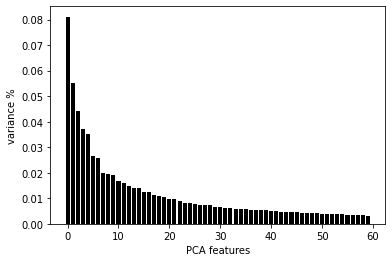

In [ ]:
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')

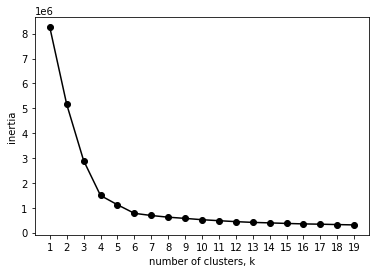

In [ ]:
ks = range(1,20)
inertias = []
for k in ks:
    #Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

Text(0, 0.5, 'PCA 2')

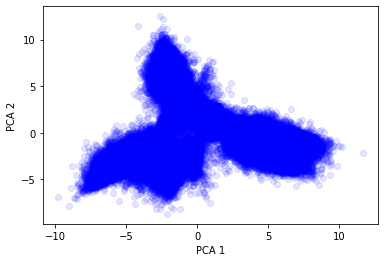

In [ ]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='blue')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

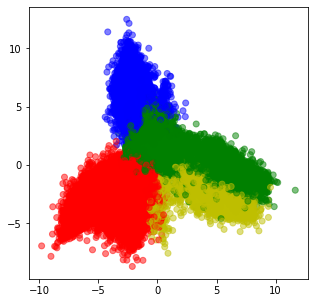

In [ ]:
kmeans = KMeans(n_clusters=3, max_iter =300)
kmeans.fit(PCA_components)
labels = kmeans.predict(PCA_components)
centroids = kmeans.cluster_centers_
fig = plt.figure(figsize=(5, 5))
colmap = {1: 'r', 2: 'g', 3: 'b', 4: 'y'}
colors = list(map(lambda x: colmap[x+1], labels))
plt.scatter(PCA_components[0], PCA_components[1], color=colors, alpha=0.5, edgecolor=colors)



In [ ]:
# we create a new dataframe with original features and add the pca scores and assigned clusters.
test_pca_kmeans = pd.concat([train.reset_index(drop=True),PCA_components], axis=1)
test_pca_kmeans.columns.values[-2:] = ['Component1','Component2']
test_pca_kmeans['Cluster'] = kmeans.labels_

In [ ]:
df1 = test_pca_kmeans.loc[:,['aminoAcid','Cluster']]

In [ ]:
df1

,aminoAcid,Cluster
0,AFGGYTF,1
1,AGGVKTQYF,1
2,ALHSNQPQHF,2
3,ALPLVEQYF,3
4,APPLQYSGNTIYF,1
...,...,...
225688,YSSRYFSGQSRANVLTF,1
225689,YSSSGHIGQSRANVLTF,1
225690,YSSSGQSRANVLTF,1
225691,YSSTRGKSRANVLTF,1


In [ ]:
df2 = df1.loc[df1['Cluster']== 0,:]
df3 = df1.loc[df1['Cluster']== 1,:]
df4 = df1.loc[df1['Cluster']== 2,:]
df5 = df1.loc[df1['Cluster']== 3,:]

In [ ]:
df2.count()


aminoAcid    71350
Cluster      71350
dtype: int64

In [ ]:
df3.count()

aminoAcid    85894
Cluster      85894
dtype: int64

In [ ]:
df4.count()

aminoAcid    31974
Cluster      31974
dtype: int64

In [ ]:
df5.count()

aminoAcid    36475
Cluster      36475
dtype: int64